In [1]:
from svm_source import *
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
import seaborn as sns

In [75]:
iris = datasets.load_iris()

X, y = iris.data[iris.target!=0,:2], iris.target[iris.target!=0]

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=13)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
svc = SVC(kernel="linear")
svc = svc.fit(X_train,y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.66
0.7


In [77]:
svc = SVC(kernel="poly")
svc = svc.fit(X_train,y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.72
0.68


In [84]:
data = fetch_lfw_people(min_faces_per_person=70, resize=.4)
print(data.data.shape)

(1288, 1850)


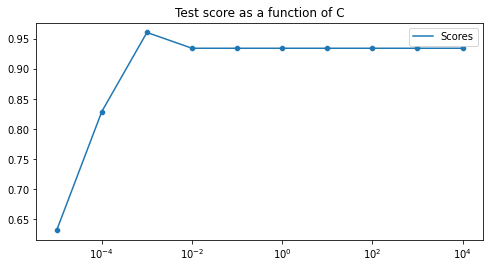

In [91]:
X, y = data.data[(data.target==1) | (data.target==6)], data.target[(data.target==1) | (data.target==6)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=13)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scores = list()
Clist = [10**i for i in range(-5,5,1)]

for C in Clist:
    svc = SVC(kernel="linear",C=C)
    svc = svc.fit(X_train, y_train)
    scores.append(svc.score(X_test,y_test))

plt.figure(figsize=(8,4))
g_results=sns.lineplot(x=Clist,y=scores,label="Scores")
g_results.set(xscale='log')
g_results=sns.scatterplot(x=Clist,y=scores)
g_results.set(xscale='log')
plt.legend()
plt.title("Test score as a function of C")
plt.show()

In [92]:
from sklearn.decomposition import PCA

noise_train = np.random.randn(len(X_train),300)
noise_test = np.random.randn(len(X_test),300)

X_train_noised = np.concatenate([X_train, noise_train], axis=1)
X_test_noised = np.concatenate([X_test, noise_test], axis=1)

pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train_noised)
X_test_pca = pca.transform(X_test_noised)

svc = SVC(kernel="linear", C=10**-3)

svc = svc.fit(X_train, y_train)
print("No noise train score :")
print(svc.score(X_train, y_train))
print("No noise test score :")
print(svc.score(X_test, y_test))

svc = SVC(kernel="linear", C=10**-3)

svc = svc.fit(X_train_noised, y_train)
print("Noisy score train :")
print(svc.score(X_train_noised, y_train))
print("Noisy score test :")
print(svc.score(X_test_noised, y_test))

svc = SVC(kernel="linear", C=10**-3)

svc = svc.fit(X_train_pca, y_train)
print("Noisy score train :")
print(svc.score(X_train_pca, y_train))
print("Noisy score test :")
print(svc.score(X_test_pca, y_test))

No noise train score :
0.9901315789473685
No noise test score :
0.9605263157894737
Noisy score train :
0.9967105263157895
Noisy score test :
0.9736842105263158
Noisy score train :
0.993421052631579
Noisy score test :
0.9473684210526315


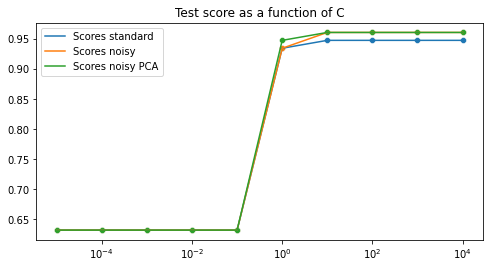

In [97]:
X, y = data.data[(data.target==1) | (data.target==6)], data.target[(data.target==1) | (data.target==6)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=13)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA

noise_train = np.random.randn(len(X_train),300)
noise_test = np.random.randn(len(X_test),300)

X_train_noised = np.concatenate([X_train, noise_train], axis=1)
X_test_noised = np.concatenate([X_test, noise_test], axis=1)

pca = PCA(.95)
X_train_pca = pca.fit_transform(X=X_train_noised)
X_test_pca = pca.transform(X_test_noised)

scores1 = list()
scores2 = list()
scores3 = list()
Clist = [10**i for i in range(-5,5,1)]

for C in Clist:
    svc = SVC(kernel="rbf",C=C)
    svc = svc.fit(X_train, y_train)
    scores1.append(svc.score(X_test,y_test))
    svc = svc.fit(X_train_noised, y_train)
    scores2.append(svc.score(X_test_noised,y_test))
    svc = svc.fit(X_train_pca, y_train)
    scores3.append(svc.score(X_test_pca,y_test))

plt.figure(figsize=(8,4))
sns.lineplot(x=Clist,y=scores1,label="Scores standard")
sns.scatterplot(x=Clist,y=scores1)
sns.lineplot(x=Clist,y=scores2,label="Scores noisy")
sns.scatterplot(x=Clist,y=scores2)
sns.lineplot(x=Clist,y=scores3,label="Scores noisy PCA")
sns.scatterplot(x=Clist,y=scores3)
plt.xscale("log")
plt.legend()
plt.title("Test score as a function of C")
plt.show()